In [1]:
from TensorHelpers import *
from QFT import *
from MPS import *

import numpy as np
from qiskit.visualization import array_to_latex

# Animation of creating the QFT MPO with 6 qubits

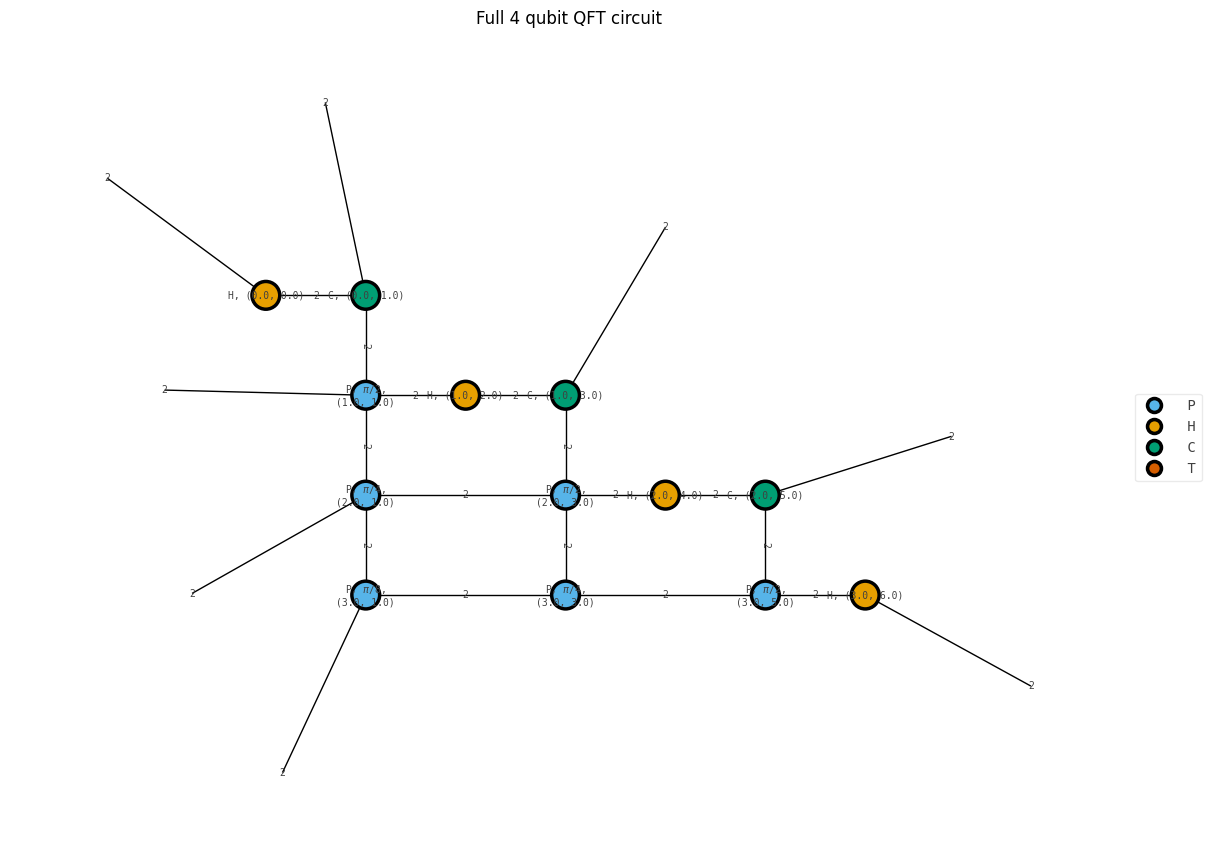

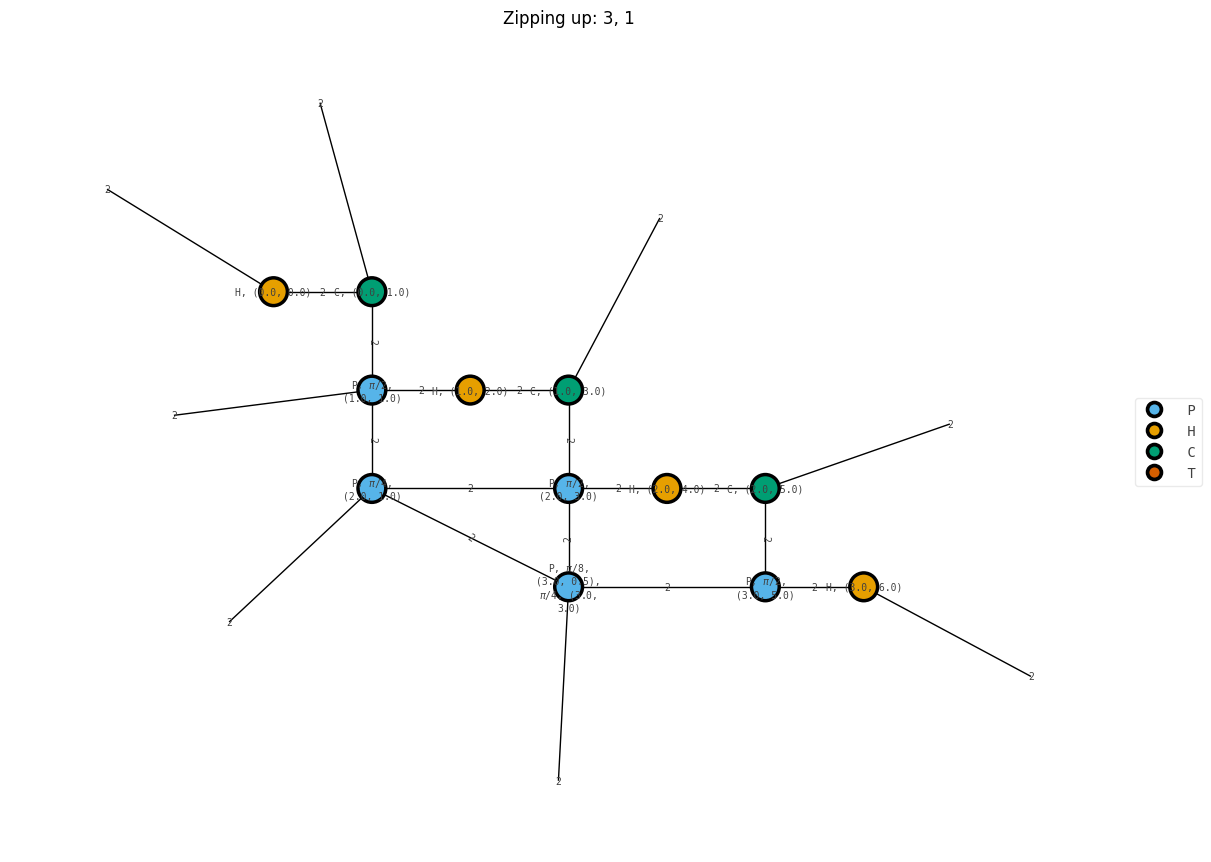

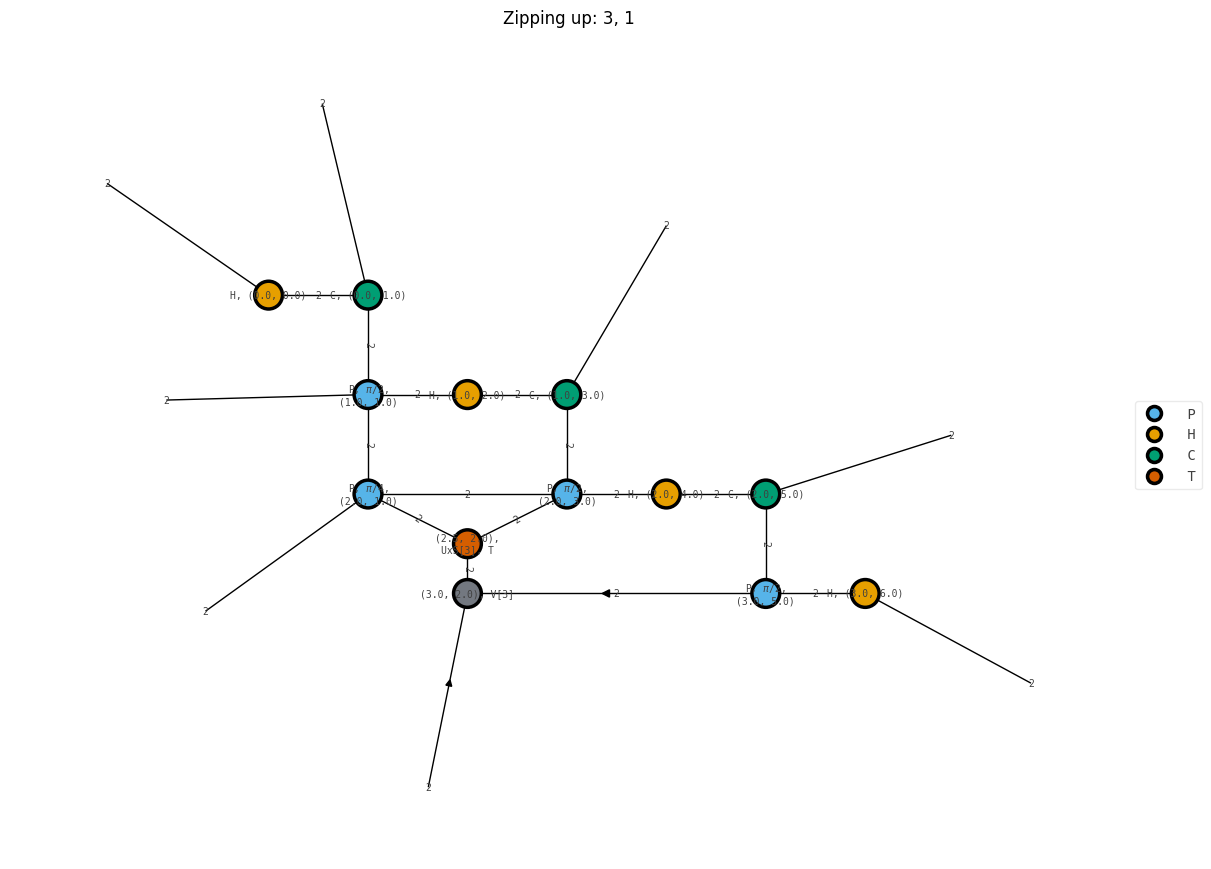

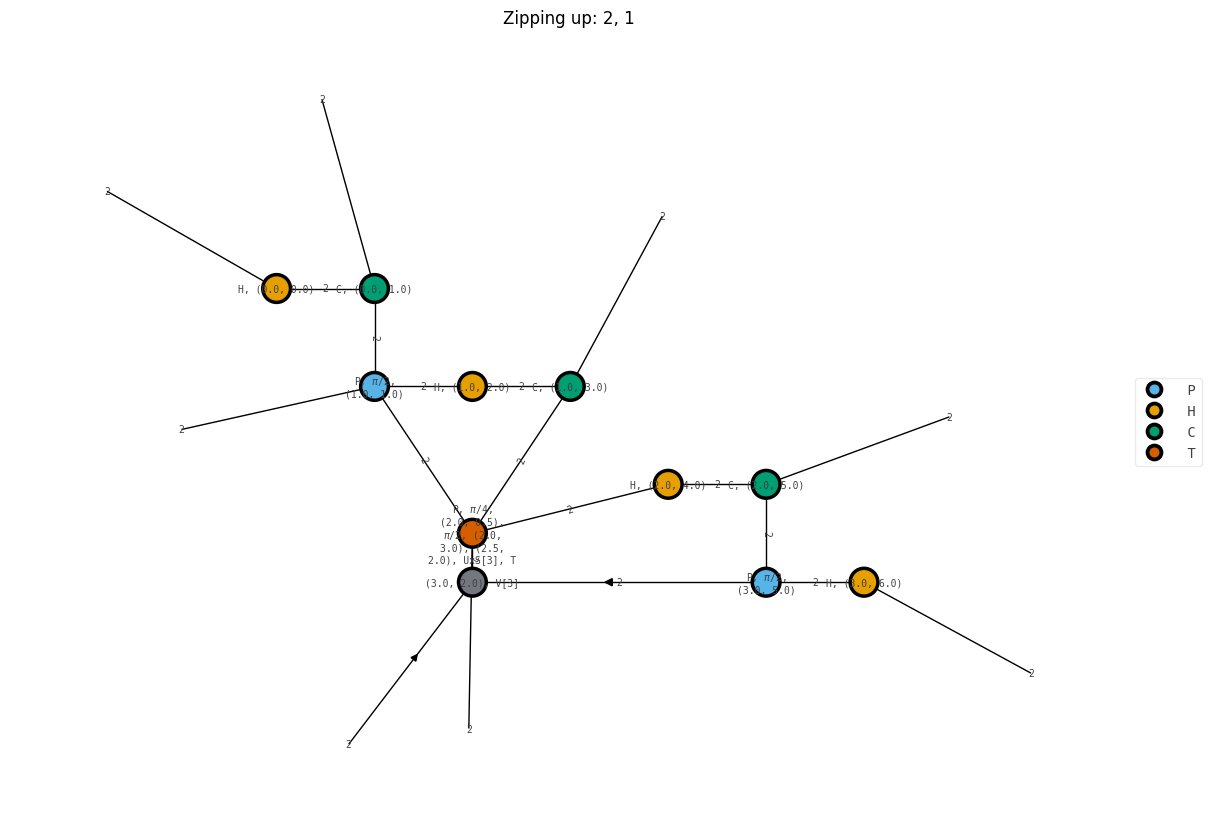

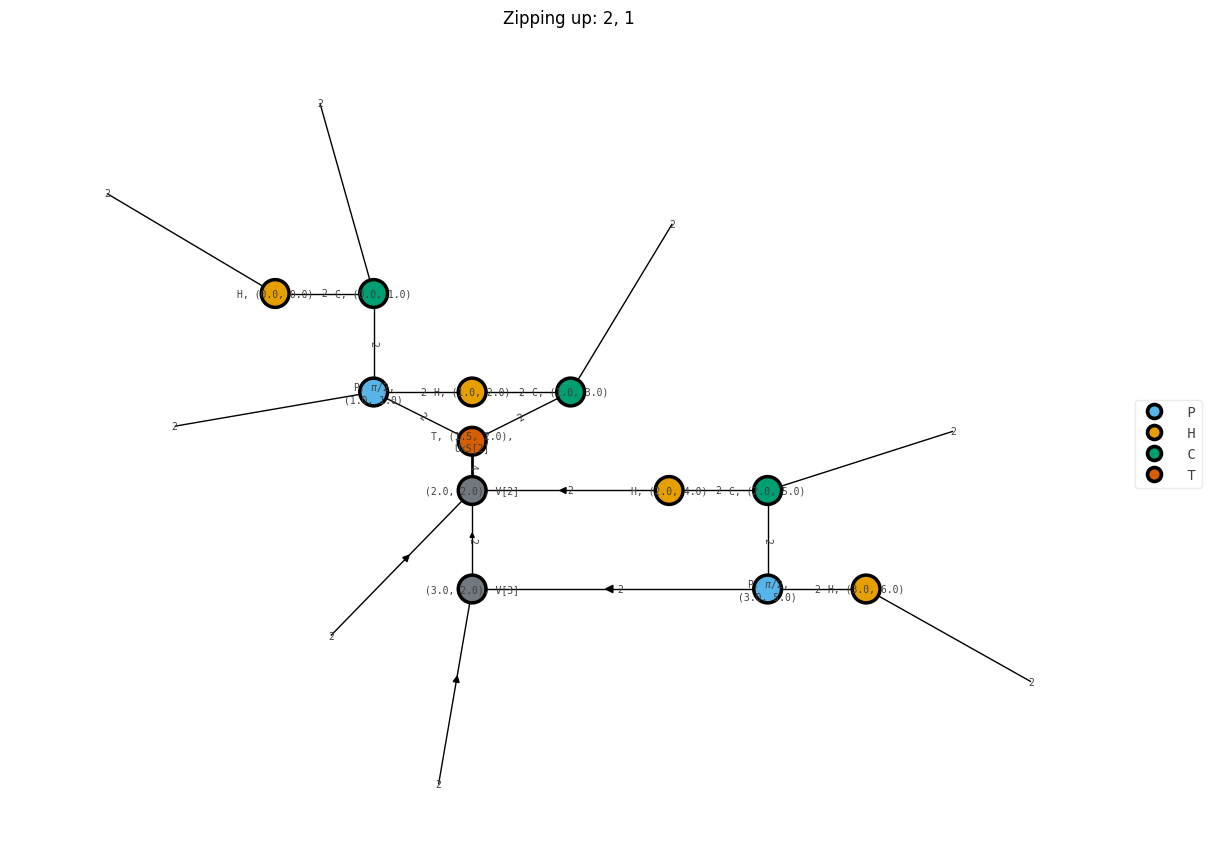

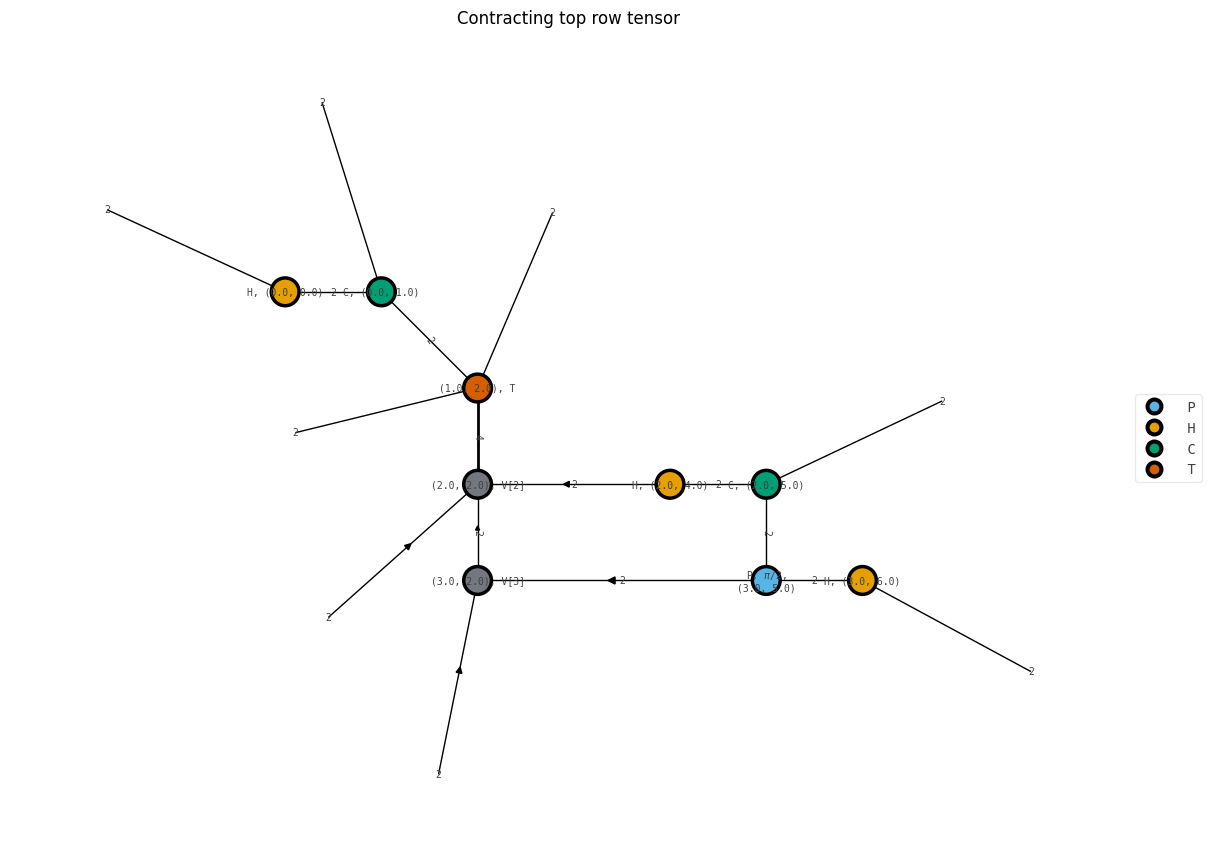

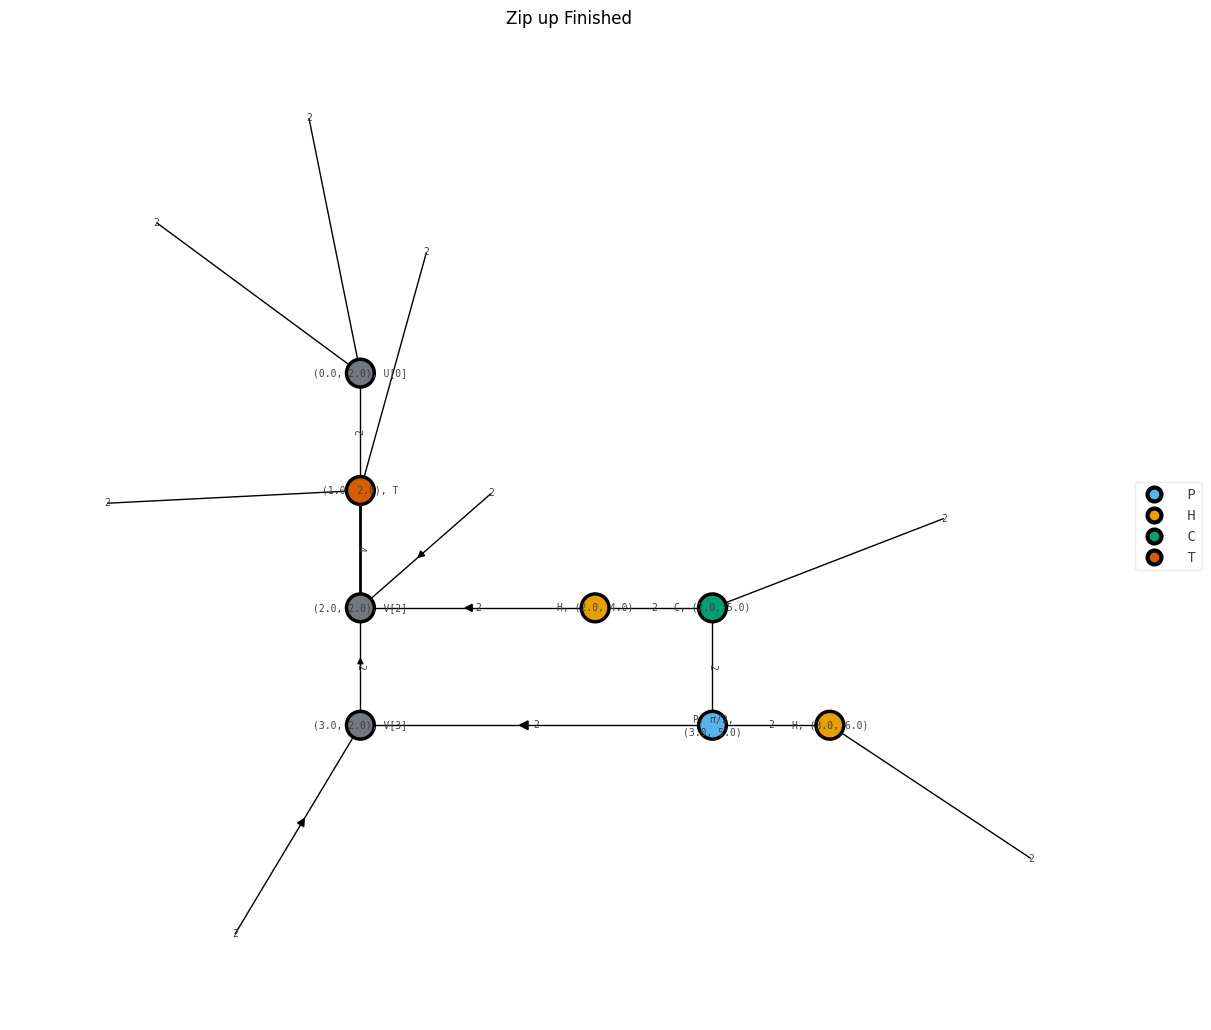

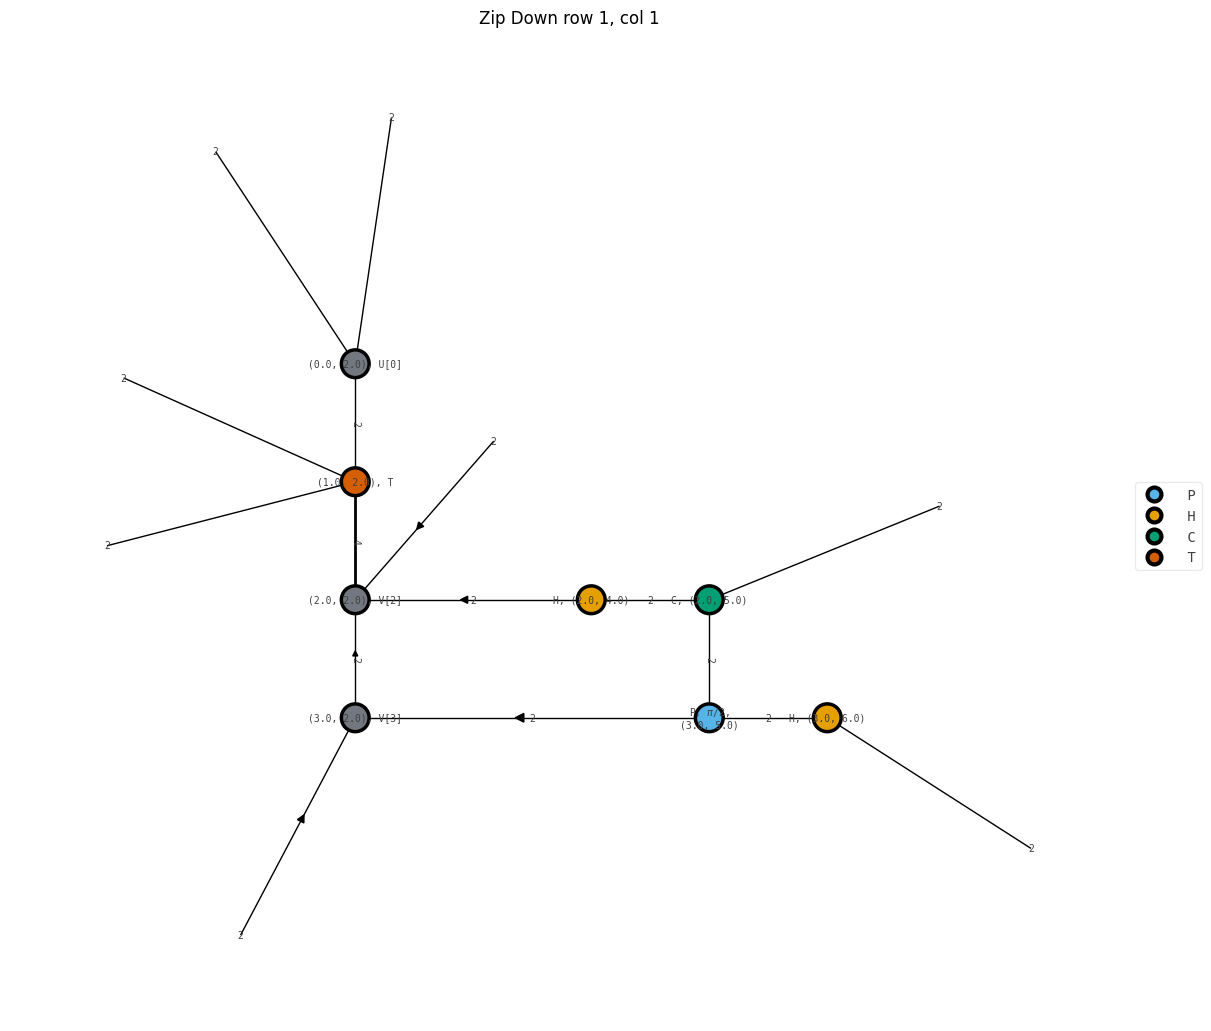

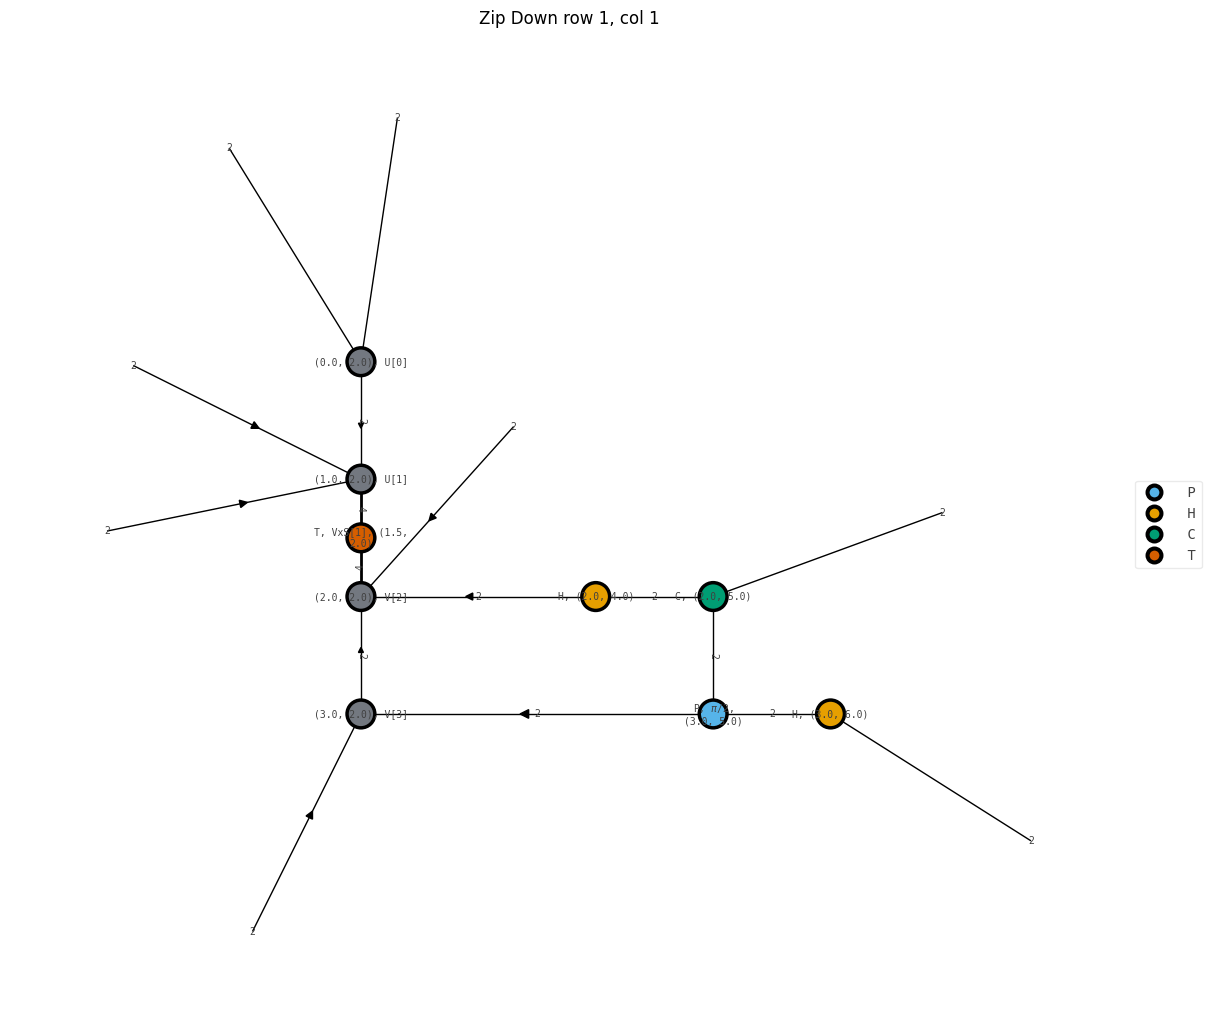

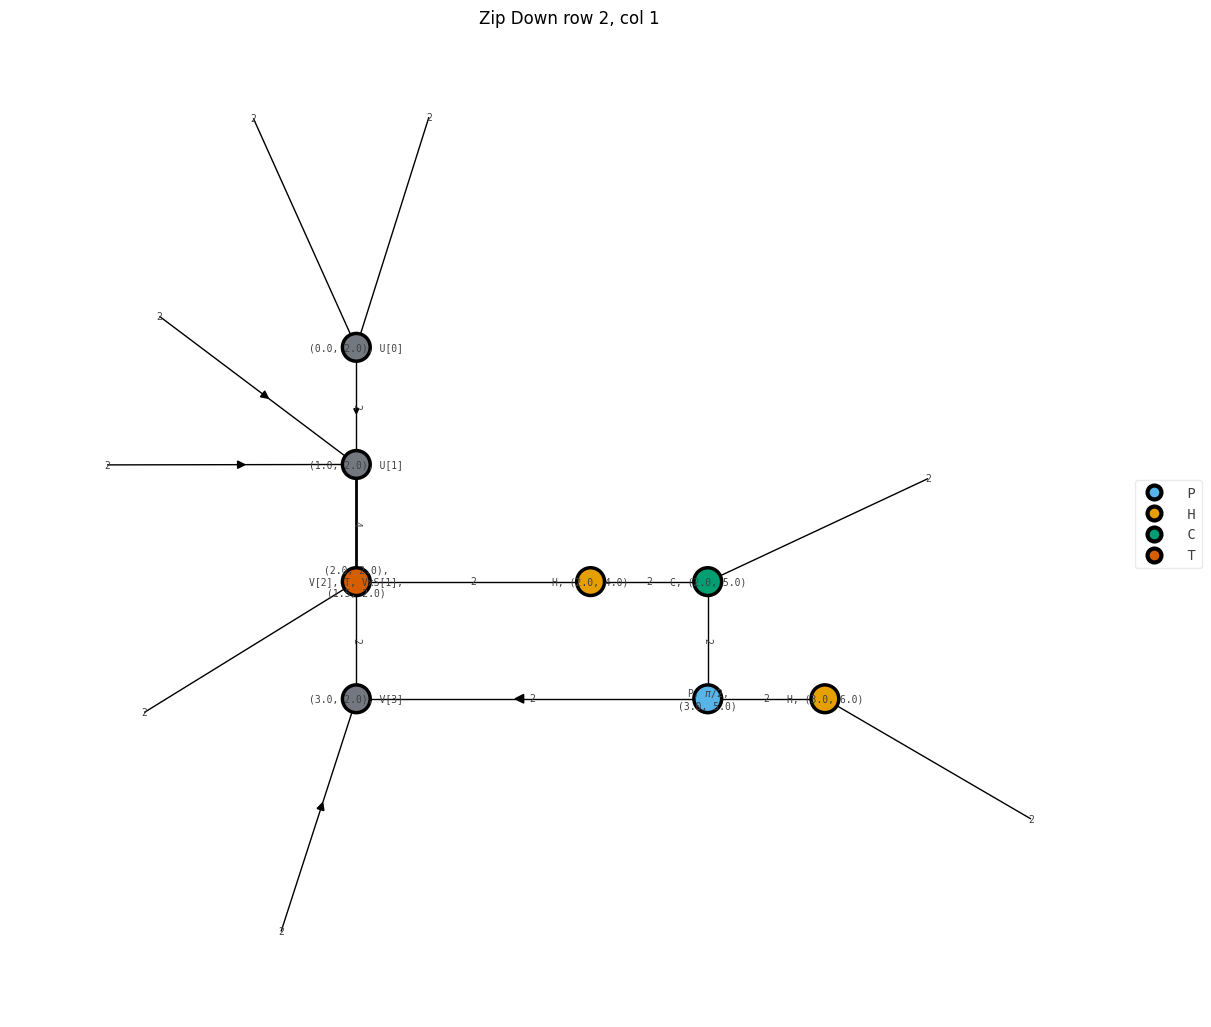

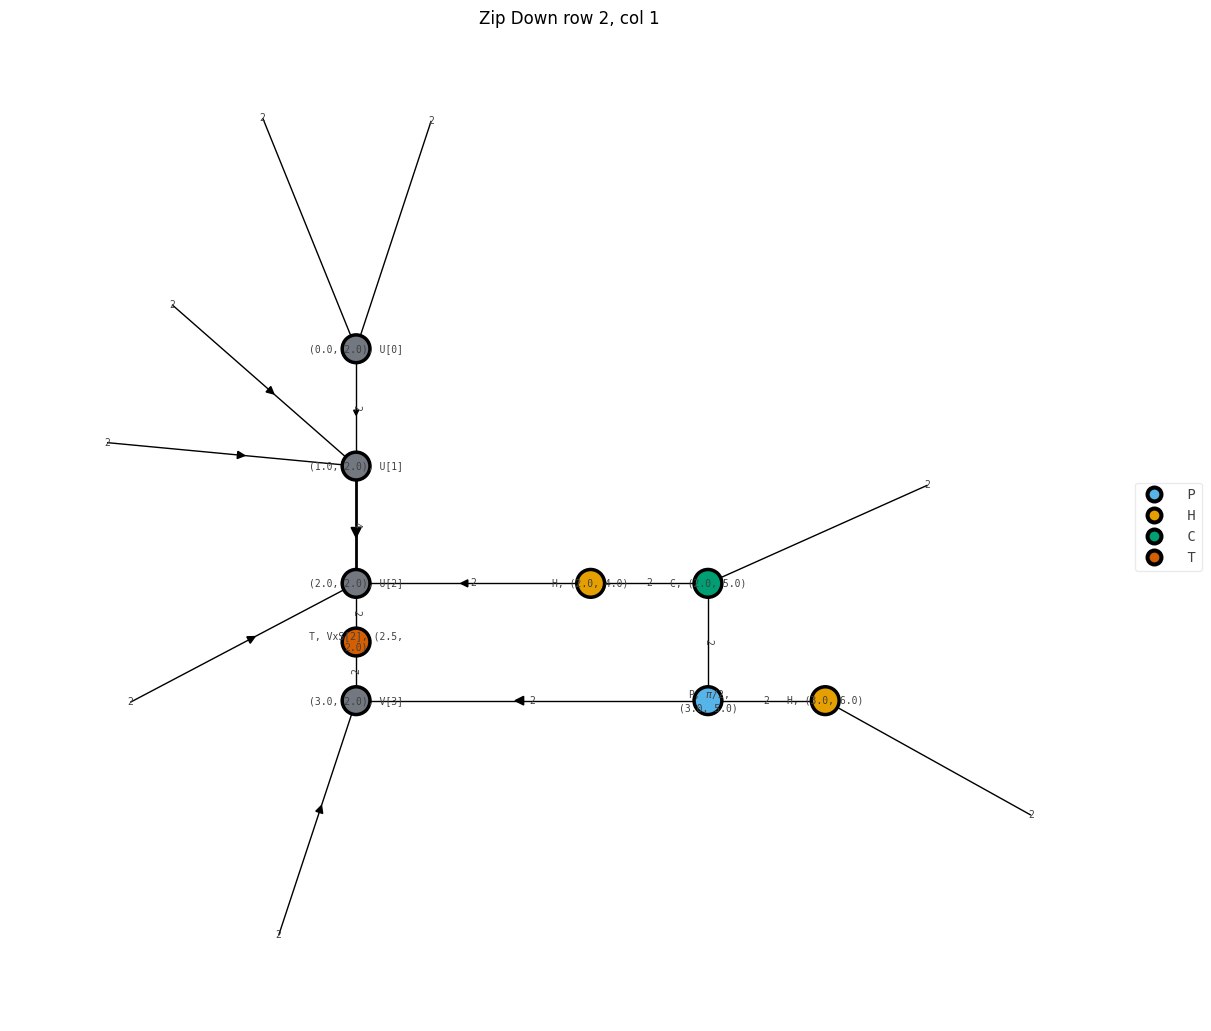

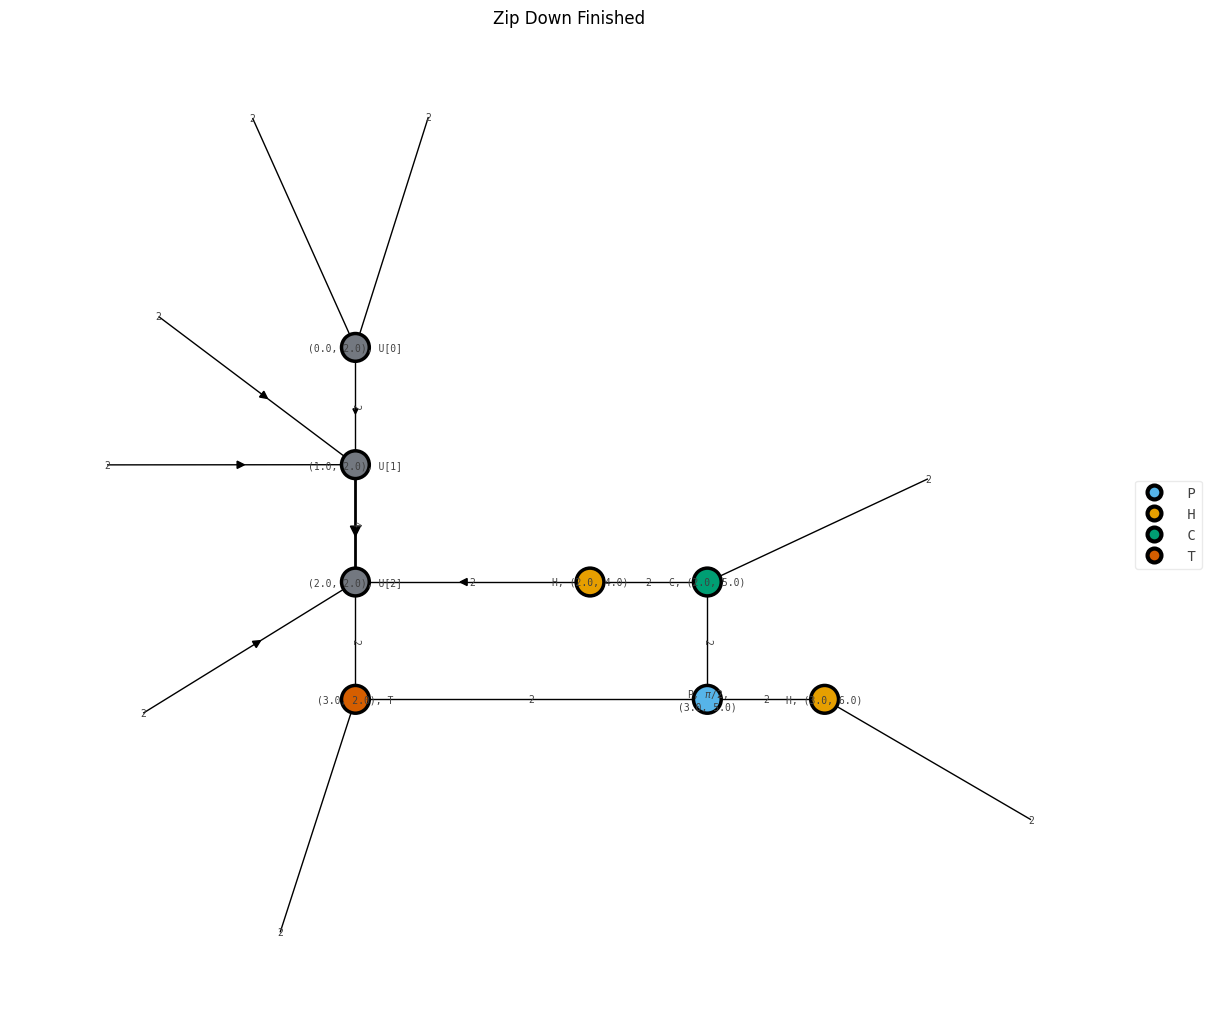

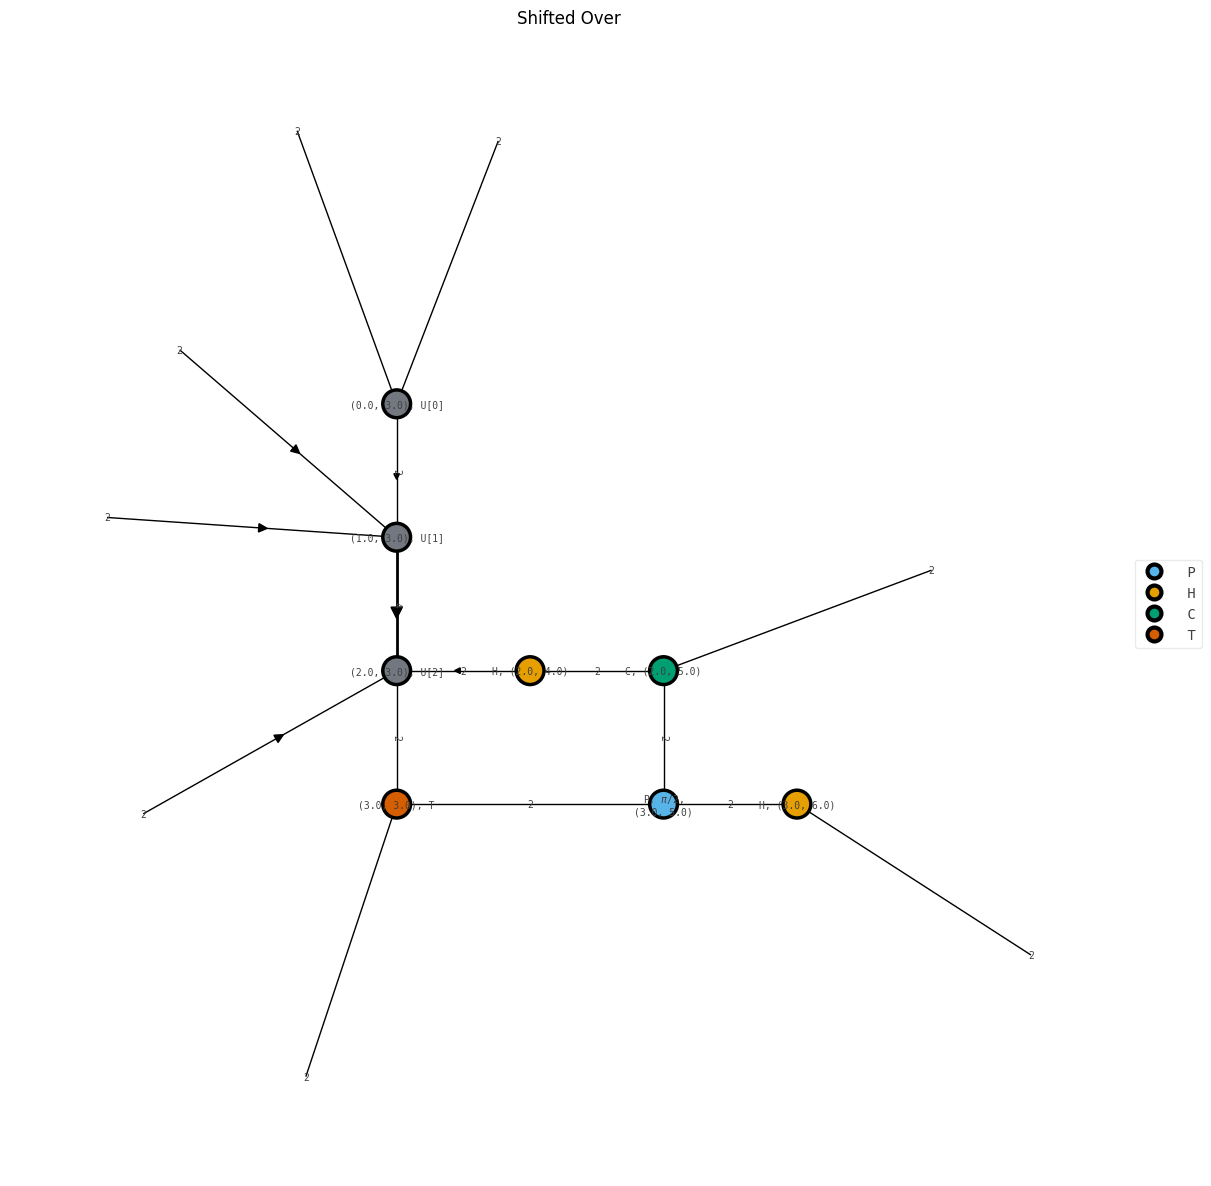

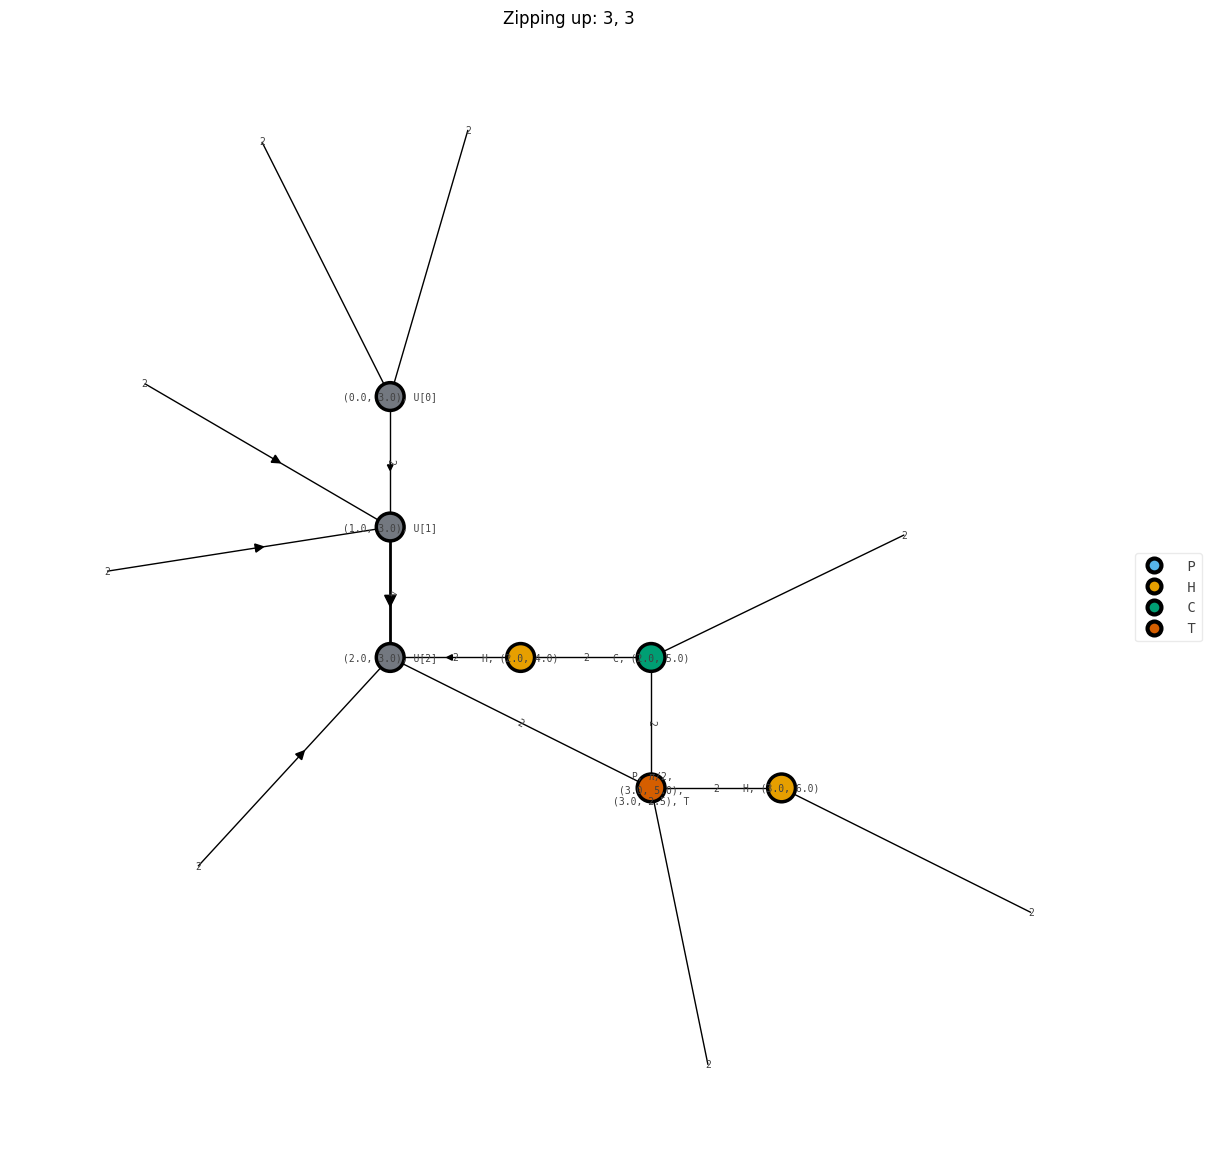

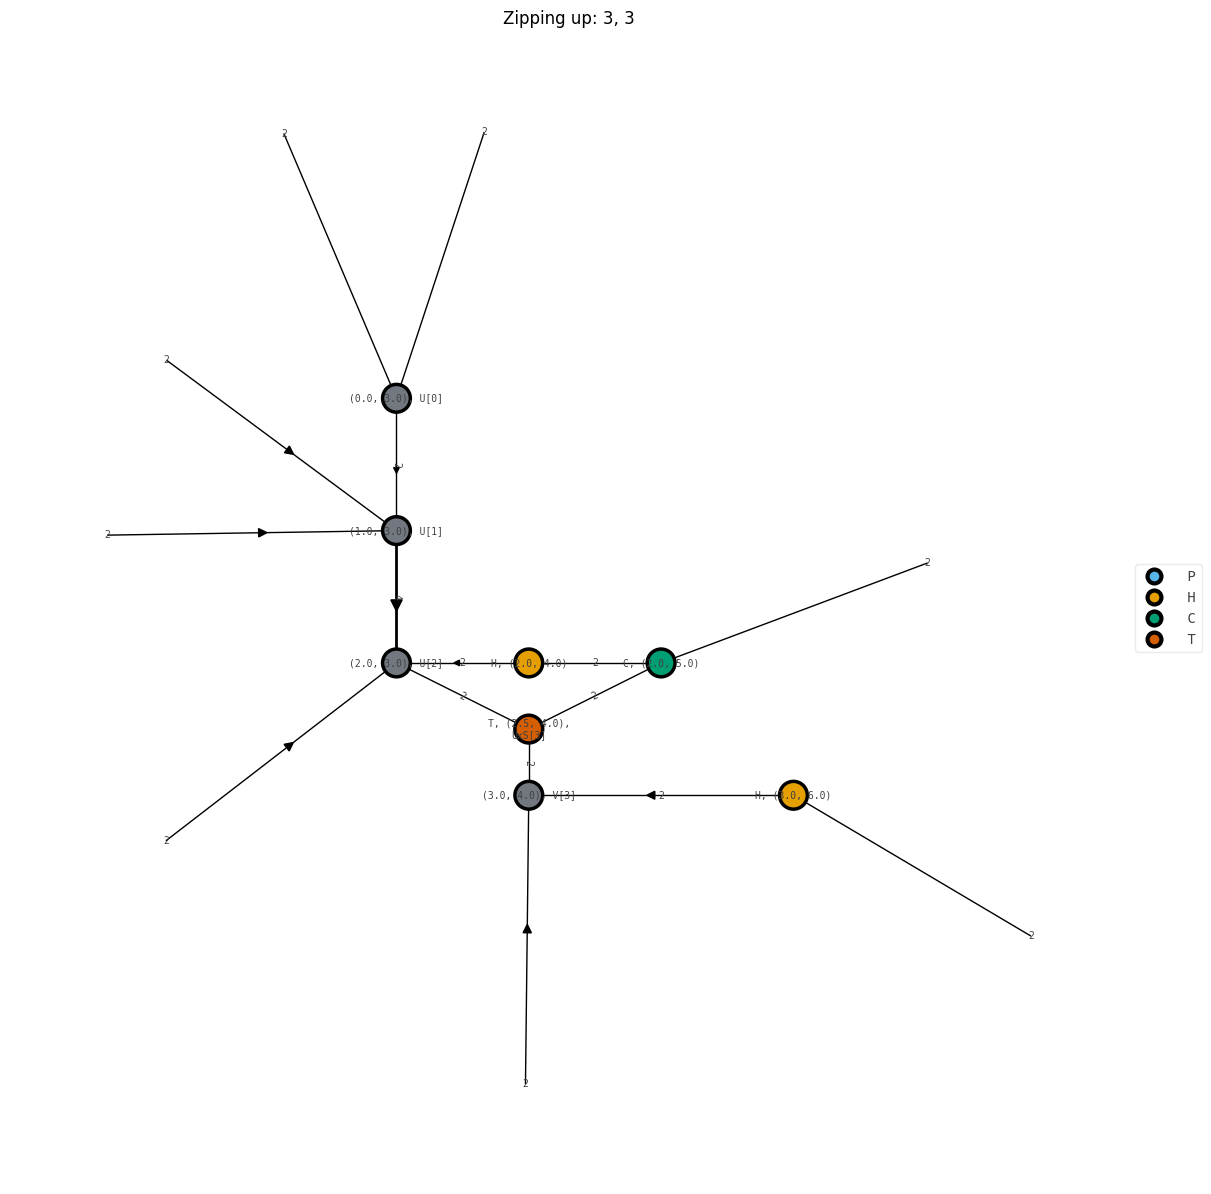

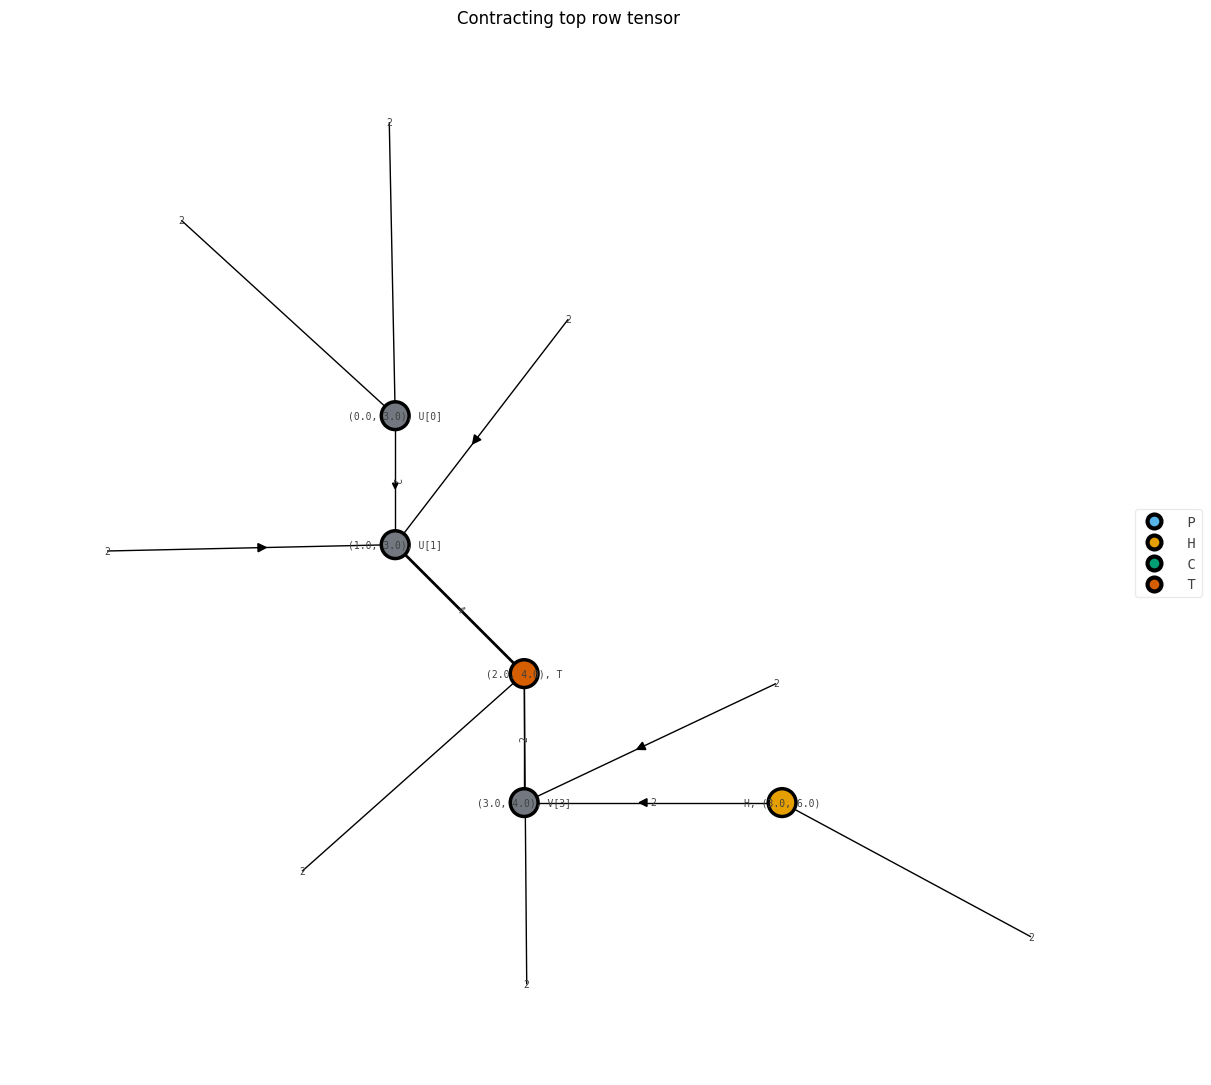

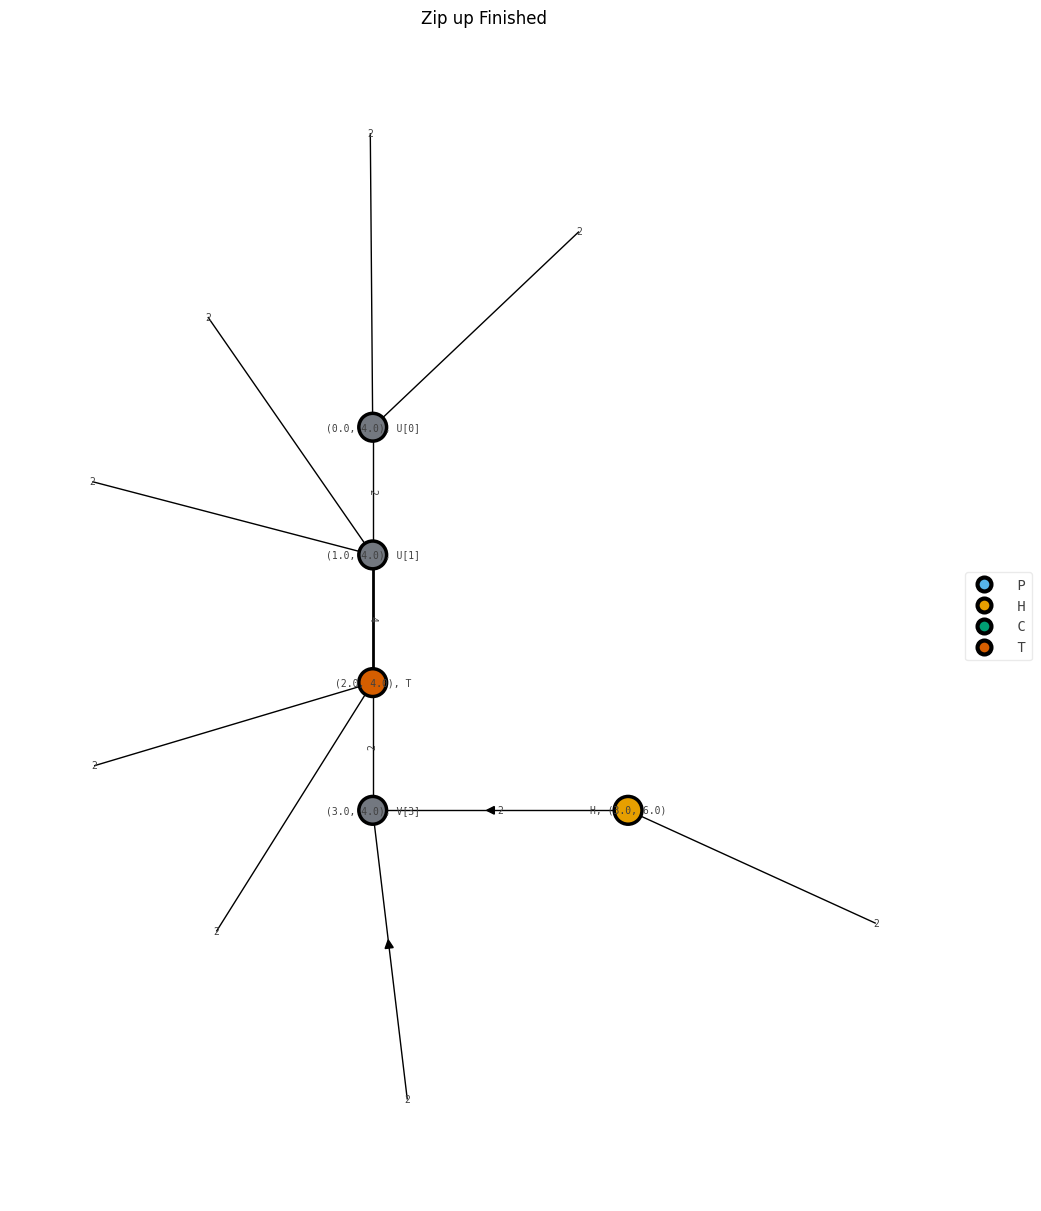

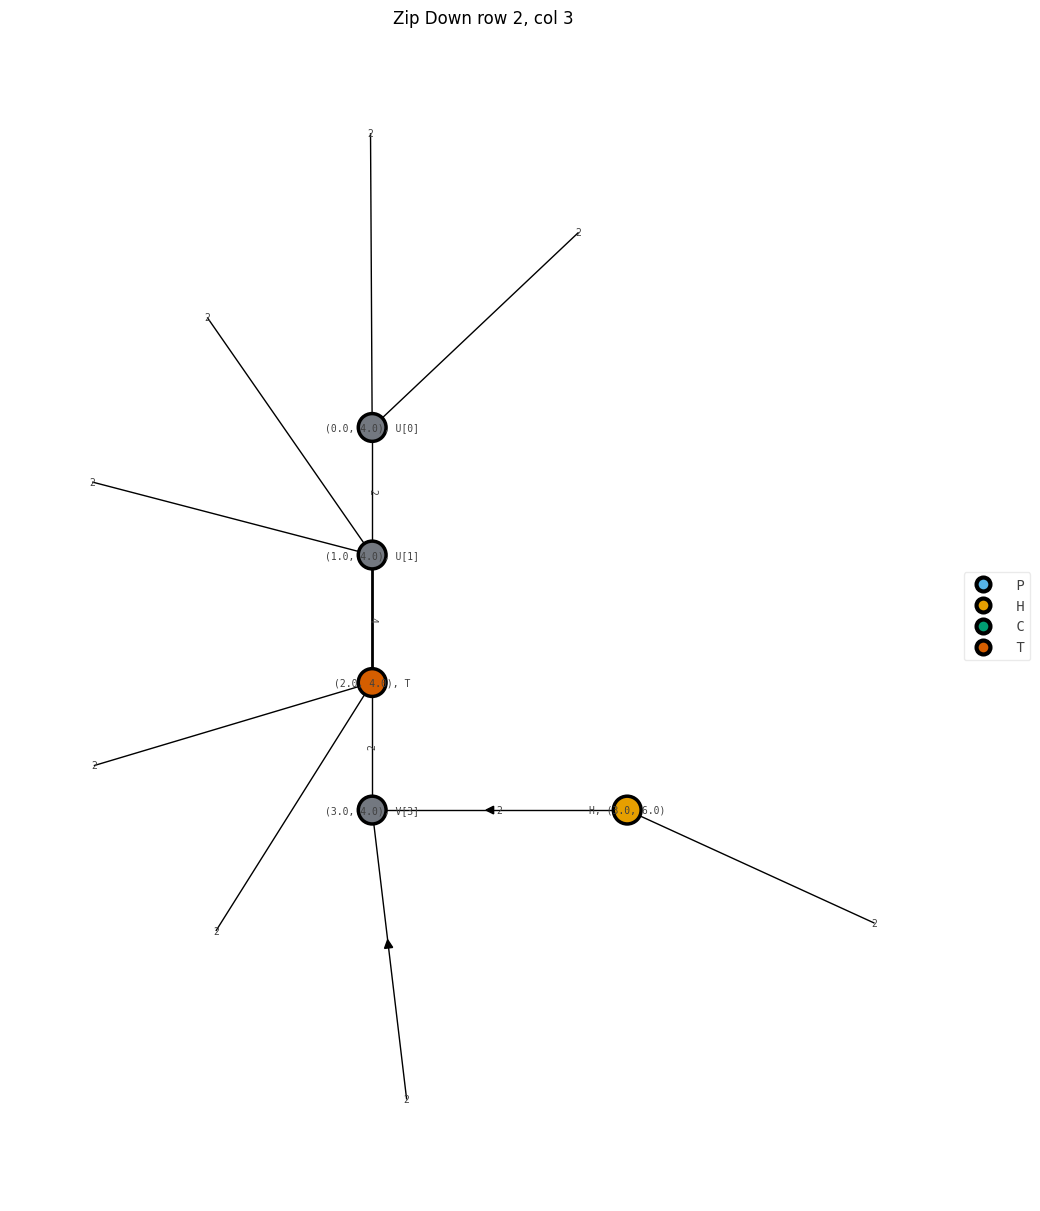

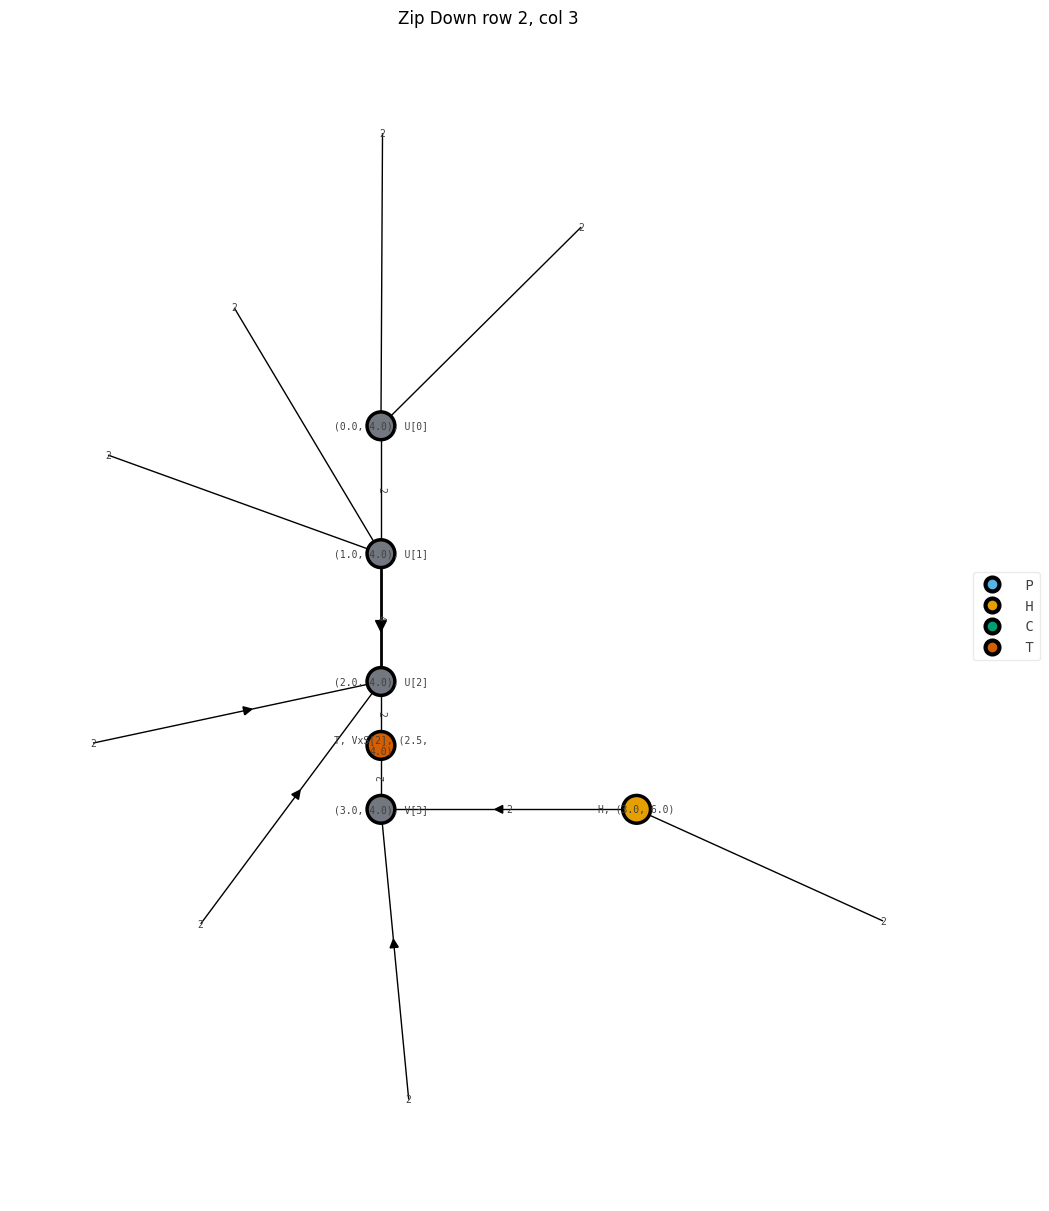

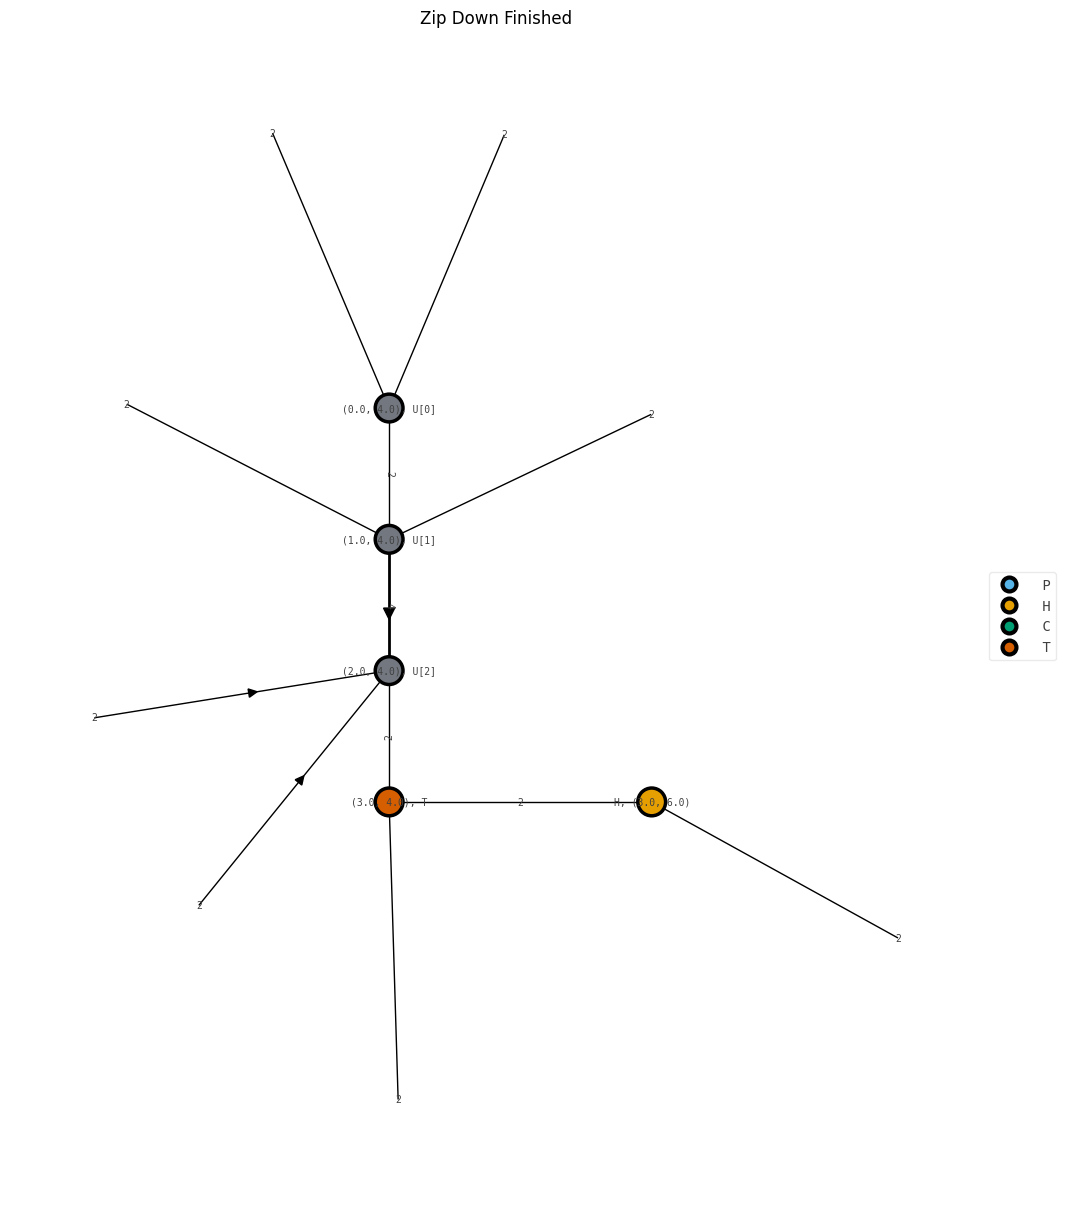

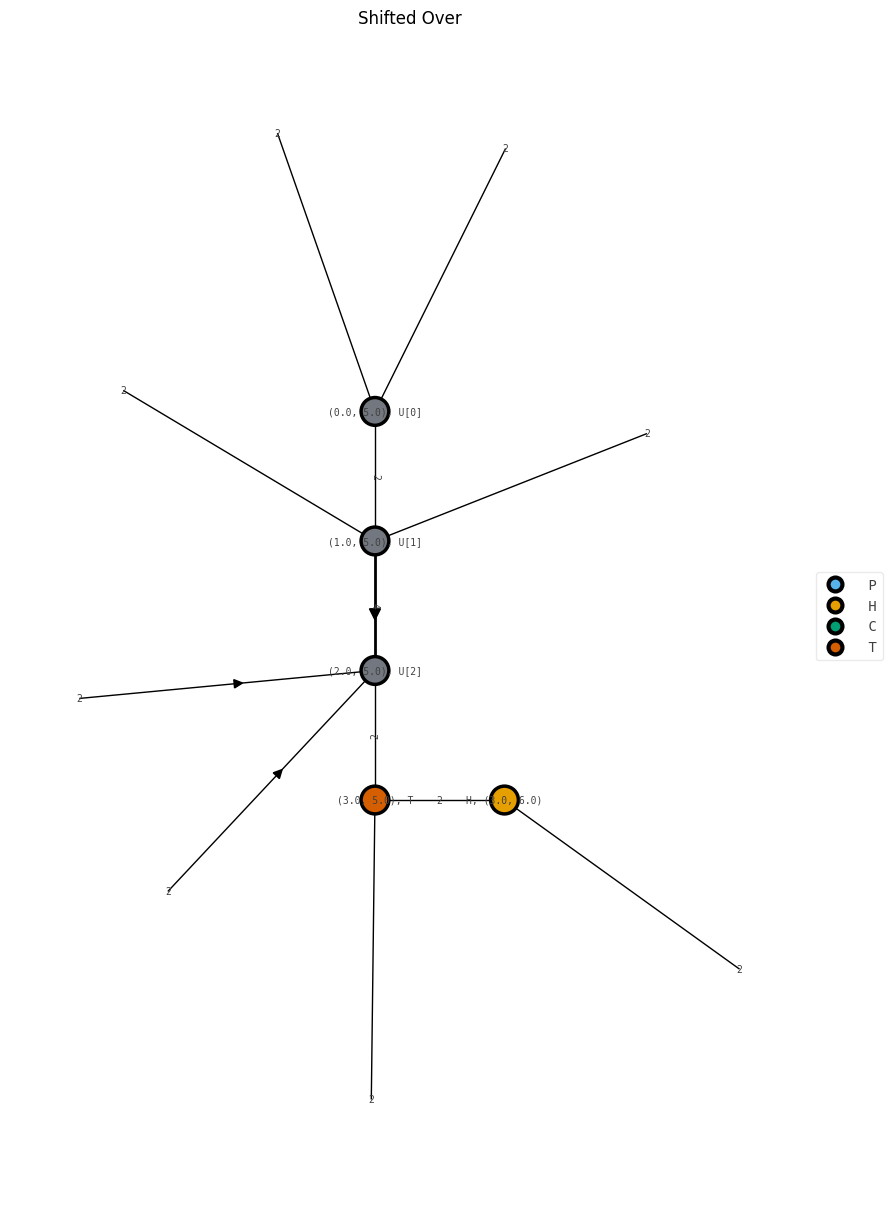

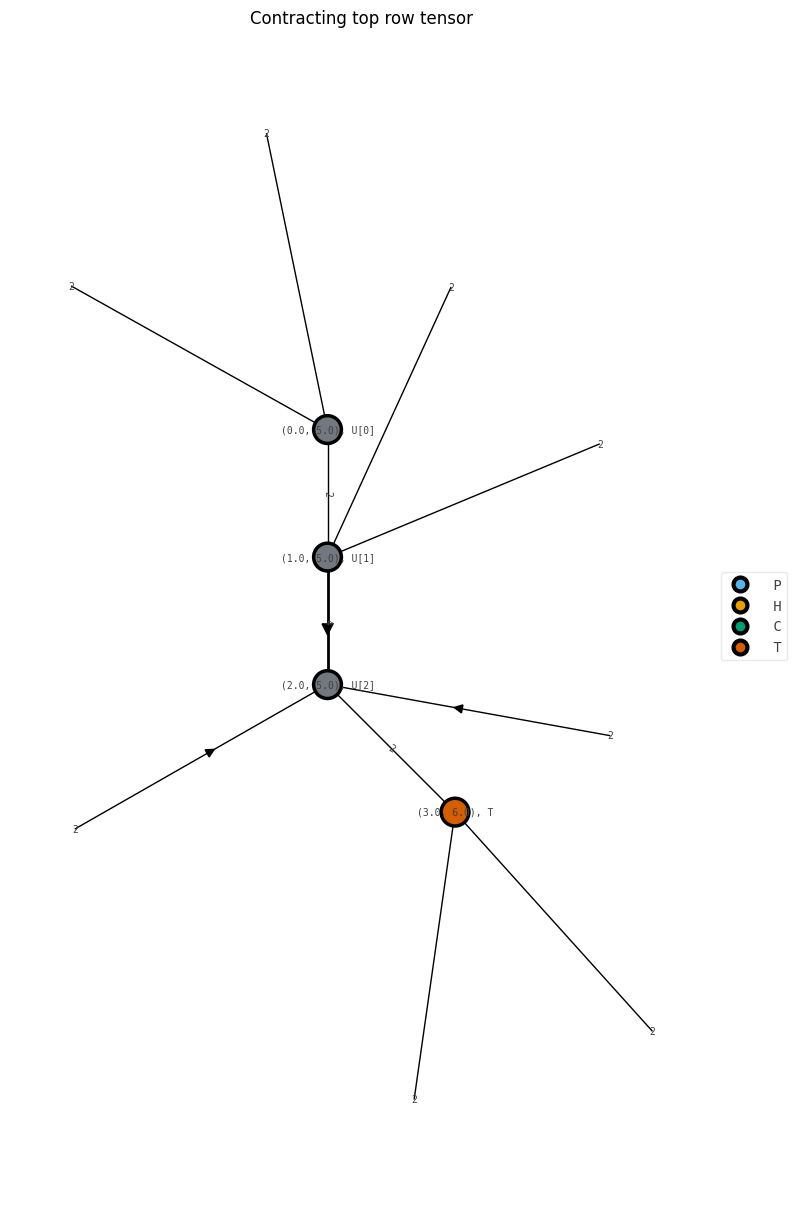

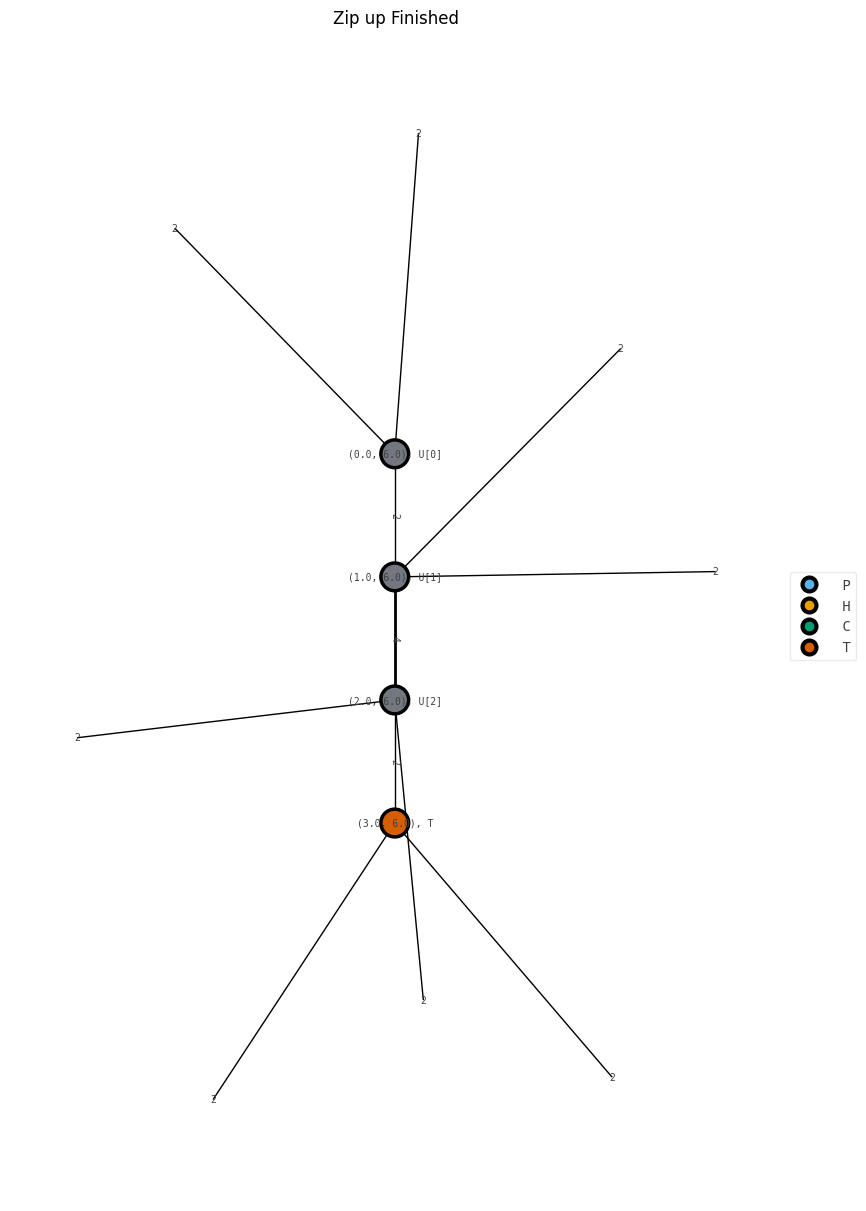

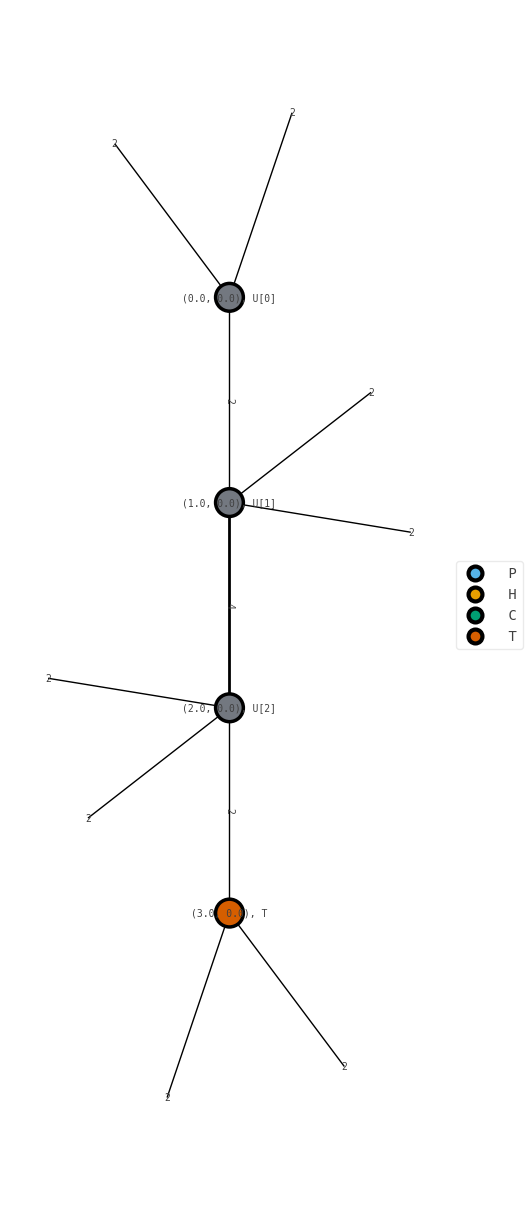

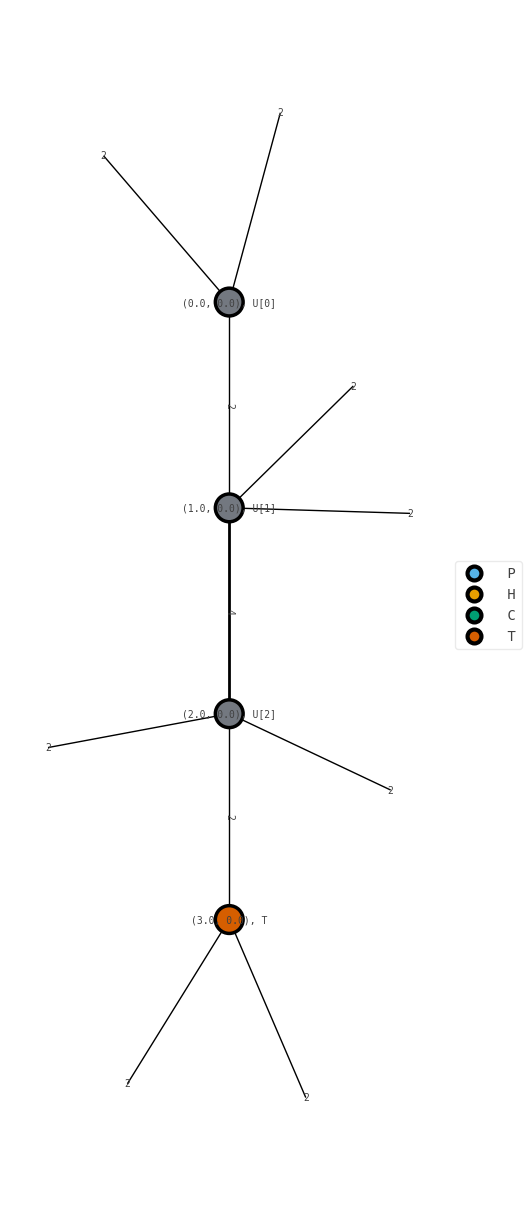

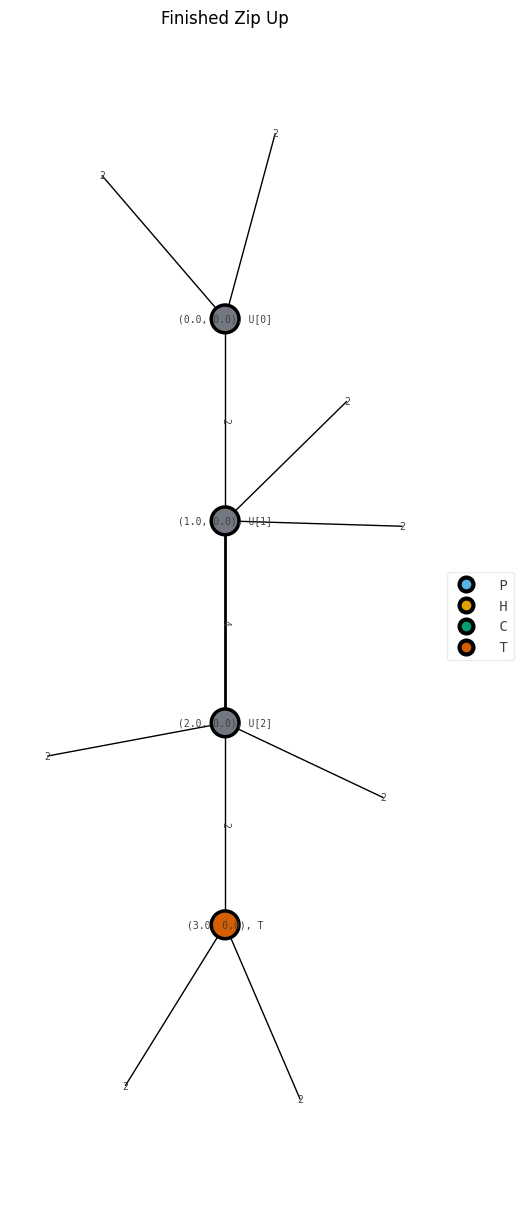

Tensor shape: (2, 2, 2)
Tensor: Tensor(shape=(2, 2, 2), inds=('b000', 'k000', 'z000'), tags=oset(['(0.0, 0.0)', 'U[0]']), backend='numpy', dtype='complex128')
Tensor Data:
 [[[-8.40896415e-01+0.00000000e+00j -2.11348741e-16-1.03648486e-31j]
  [-8.40896415e-01+0.00000000e+00j -2.11348741e-16-1.03648486e-31j]]

 [[ 1.32028512e-16-1.65035640e-16j -5.25303826e-01+6.56629783e-01j]
  [-1.32028512e-16+1.65035640e-16j  5.25303826e-01-6.56629783e-01j]]]

Tensor shape: (2, 2, 2, 4)
Tensor: Tensor(shape=(2, 2, 2, 4), inds=('b001', 'k001', 'z000', 'z001'), tags=oset(['(1.0, 0.0)', 'U[1]']), backend='numpy', dtype='complex128')
Tensor Data:
 [[[[-0.32950547-4.72890047e-17j  0.33102289-1.25461706e-01j
    -0.14606924-2.14775592e-16j -0.01378832+7.53327092e-03j]
   [-0.36842917-1.16803204e-01j  0.13324913-7.37309480e-03j
     0.11870639+3.76335207e-02j  0.0409041 -7.99531840e-03j]]

  [[-0.32950547-4.75404244e-17j  0.33102289-1.25461706e-01j
    -0.14606924-2.21696308e-16j -0.01378832+7.53327092e-03j

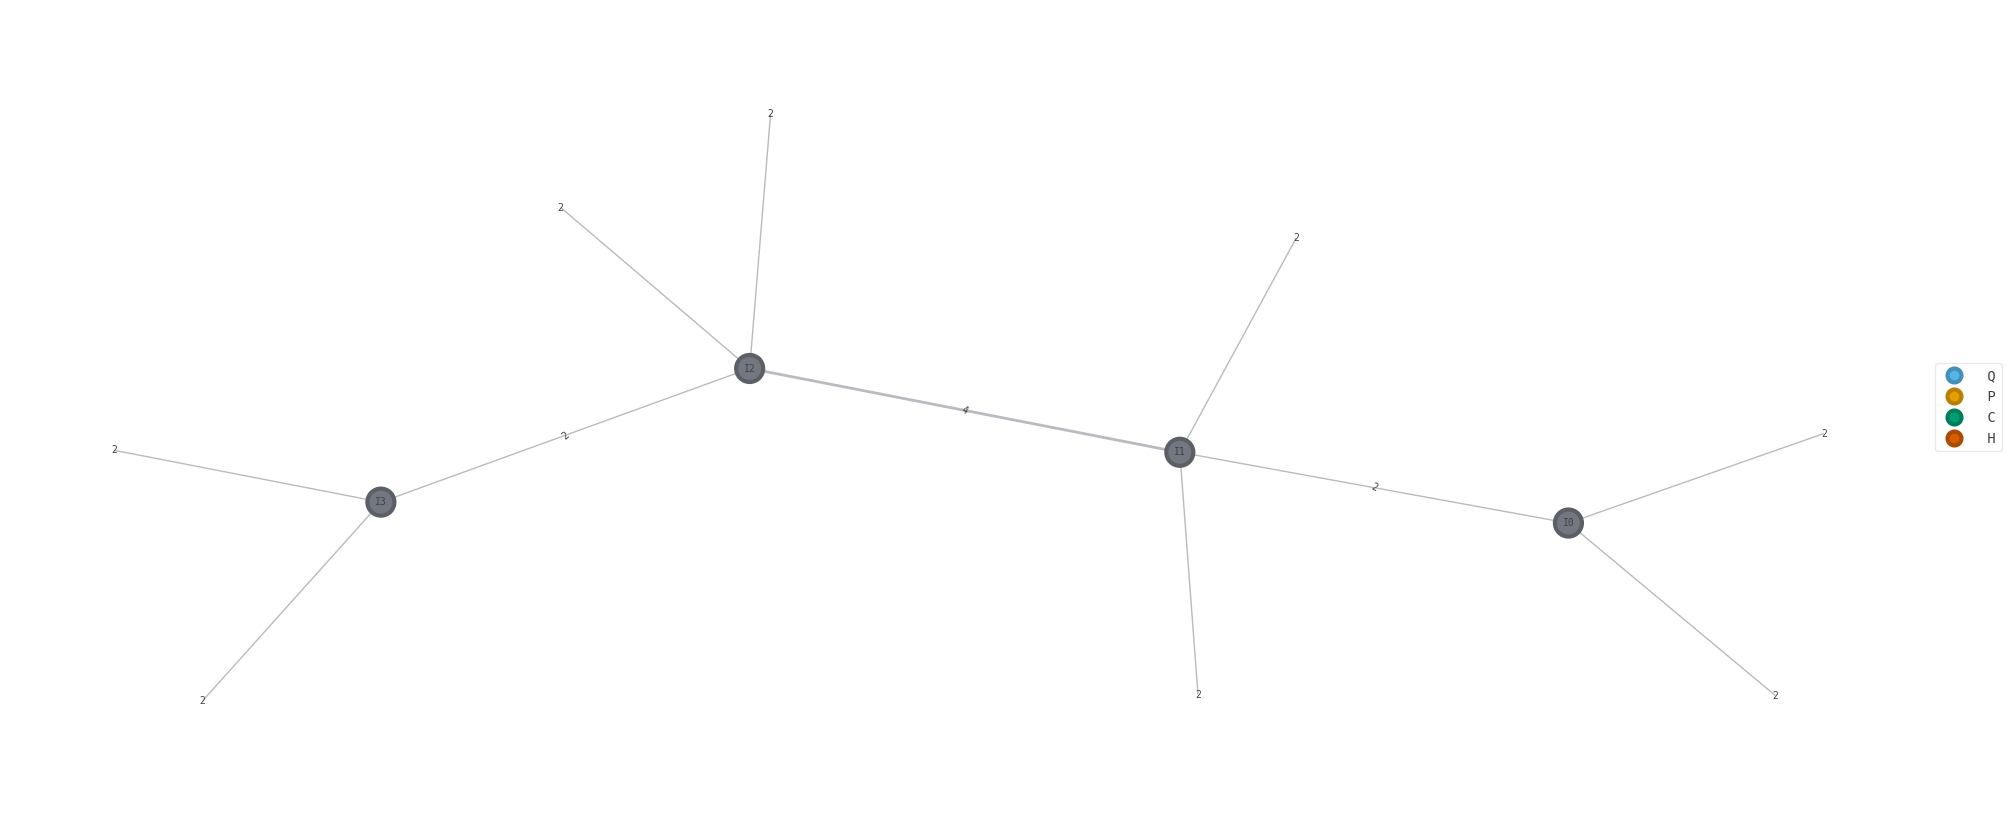

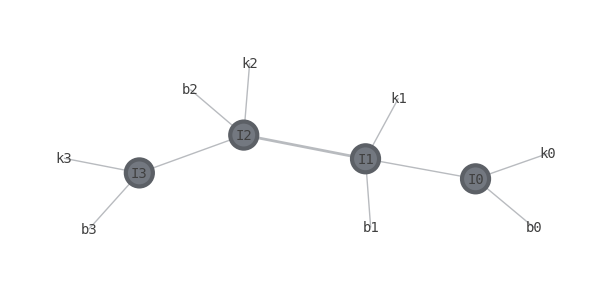

In [2]:
N = 4
QFT_MPO = QFT(N)
QFT_MPO.create_circuit()
QFT_MPO.draw(f"Full {N} qubit QFT circuit")
mpo = QFT_MPO.create_MPO(max_bond_dim=-1, cutoff=1e-15, verbose=True, reverse=True)

mpo.draw()

# MPS for $f(x) = e^{2\pi i x}$

In [3]:
def f(x):
    return np.exp(2j * np.pi * x)

In [4]:
QFT_mps = MPS(N)

mps = QFT_mps.create_MPS(
    [f], 
    0, 
    1.0, 
    max_bond=-1,
    cutoff=1e-15,
    reverse=True
)

# Comparing QFT MPS applied to MPO with the FFT

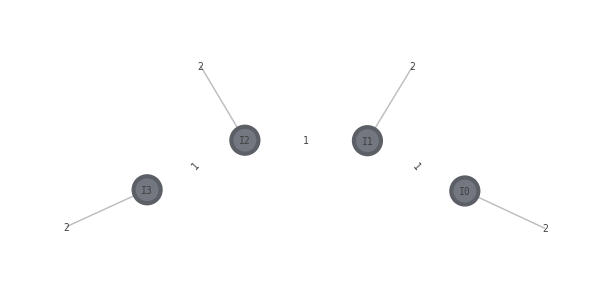

In [5]:
mpo_mps_res = mpo.apply(mps, compress=True)
mpo_mps_res.draw(show_inds='bond-size')

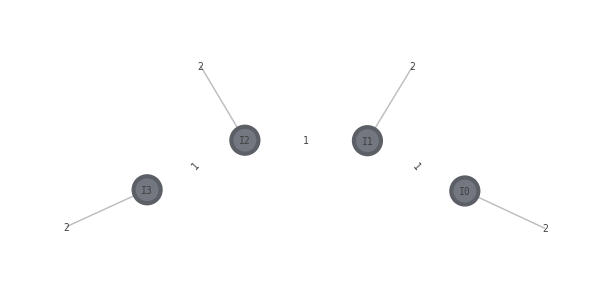

In [6]:
mpo_mps_res = mpo.apply(mps, compress=True)
mpo_mps_res.draw(show_inds='bond-size')

## QFT output vector

In [7]:
python_mpo_mps_res = mpo_mps_res.to_dense().reshape(-1,)
array_to_latex(python_mpo_mps_res, precision=16, max_size=10)

<IPython.core.display.Latex object>

## FFT output Vector

In [8]:
input = np.arange(0.0, 1.0, step=1/(2**N))
output = f(input)
fft_res = (np.fft.fft(output).reshape(-1,) / 2**(N/2)).reshape((-1,))

array_to_latex(fft_res, 16, max_size=10)

<IPython.core.display.Latex object>

## Vector norm difference

In [9]:
np.linalg.norm(python_mpo_mps_res - fft_res)

3.0979142766866796e-15